Mounting of drive and datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Banking_Chatbot_Material/BankFAQs.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB
None


In [ ]:
len(df)

1773

In [ ]:
df.head()

Question  \
0  What are the documents required for opening a ...   
1  Can I transfer my Current Account from one bra...   
2  My present status is NRI. What extra documents...   
3  What are the documents required for opening a ...   
4  What documents are required to change the addr...   

                                              Answer     Class  
0  Following documents are required to open a Cur...  accounts  
1  Yes, Current Accounts can be transferred from ...  accounts  
2  NRI/PIO can open the proprietorship/partnershi...  accounts  
3  Following documents are required for opening a...  accounts  
4  Following documents are required to change the...  accounts

In [ ]:
df.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [ ]:
df.dtypes

Question    object
Answer      object
Class       object
dtype: object

In [ ]:
df.duplicated

<bound method DataFrame.duplicated of                                                Question  \
0     What are the documents required for opening a ...   
1     Can I transfer my Current Account from one bra...   
2     My present status is NRI. What extra documents...   
3     What are the documents required for opening a ...   
4     What documents are required to change the addr...   
...                                                 ...   
1768                       Which languages do you speak   
1769                        how much is interest for FD   
1770             how much is interest for Fixed Deposit   
1771                                      Fixed Deposit   
1772                                                 FD   

                                                 Answer     Class  
0     Following documents are required to open a Cur...  accounts  
1     Yes, Current Accounts can be transferred from ...  accounts  
2     NRI/PIO can open the proprietorship/partner

In [ ]:
df.duplicated().sum()

274

In [ ]:
#df = df.drop_duplicates

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(df.nunique()) 

Question    1343
Answer      1446
Class          7
dtype: int64


Adding new data after deleting duplicates and merging two files

In [ ]:
df.to_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv', index=False)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Banking_Chatbot_Material/Bank_QA_C.csv', encoding='windows-1252')

In [ ]:
df2.head()

Question  \
0  Does QA 22 Account continue under Foreign Exch...   
1  Can foreign nationals resident in India open r...   
2  Should banks have a separate system to monitor...   
3  Can ADs (banks) remit proceeds of such account...   
4  In the absence of QA 22 account how the salary...   

                                              Answer               Class  
0  No. With the introduction of Foreign Exchange ...  Commercial Banking  
1  Yes. Foreign nationals resident in India can o...  Commercial Banking  
2  From exchange control point of view, no monito...  Commercial Banking  
3  Yes. But ADs (banks) should ensure that the fu...  Commercial Banking  
4  In terms of GOI notification No.SO.301(E) date...  Commercial Banking

In [ ]:
df1.head()

Question  \
0  What are the documents required for opening a ...   
1  Can I transfer my Current Account from one bra...   
2  My present status is NRI. What extra documents...   
3  What are the documents required for opening a ...   
4  What documents are required to change the addr...   

                                              Answer     Class  
0  Following documents are required to open a Cur...  accounts  
1  Yes, Current Accounts can be transferred from ...  accounts  
2  NRI/PIO can open the proprietorship/partnershi...  accounts  
3  Following documents are required for opening a...  accounts  
4  Following documents are required to change the...  accounts

In [ ]:
dfmaster = pd.concat([df1, df2], ignore_index = True)

In [ ]:
dfmaster.to_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv', index=False)

Exploratory Data Analysis

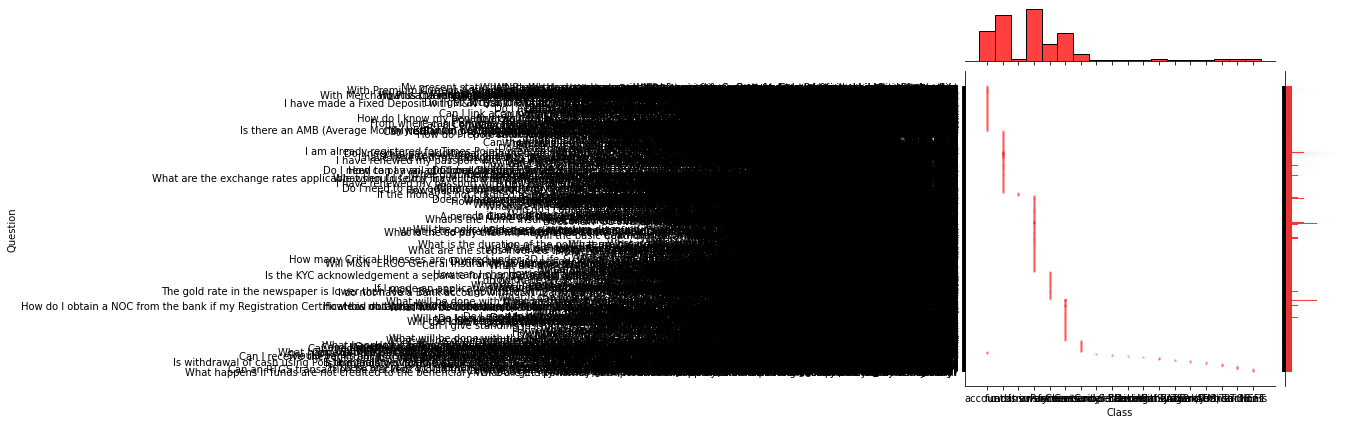

In [ ]:
import seaborn as sns
sns.jointplot(y=dfmaster['Question'],x=dfmaster['Class'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

In [ ]:
list(dfmaster.columns)

['Question', 'Answer', 'Class']

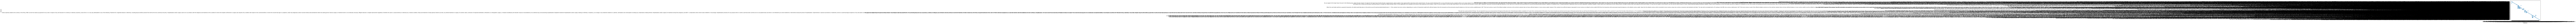

In [ ]:
import seaborn as sns
sns.scatterplot(x="Question", y="Answer", sizes=(20, 200), data=dfmaster);
#sns.heatmap(corr.corr(), annot=True)

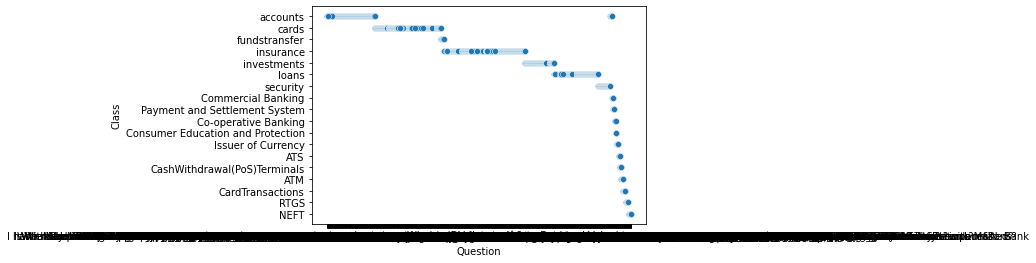

In [ ]:
import seaborn as sns
sns.scatterplot(x="Question", y="Class", sizes=(60, 200), data=dfmaster);
#sns.heatmap(corr.corr(), annot=True)

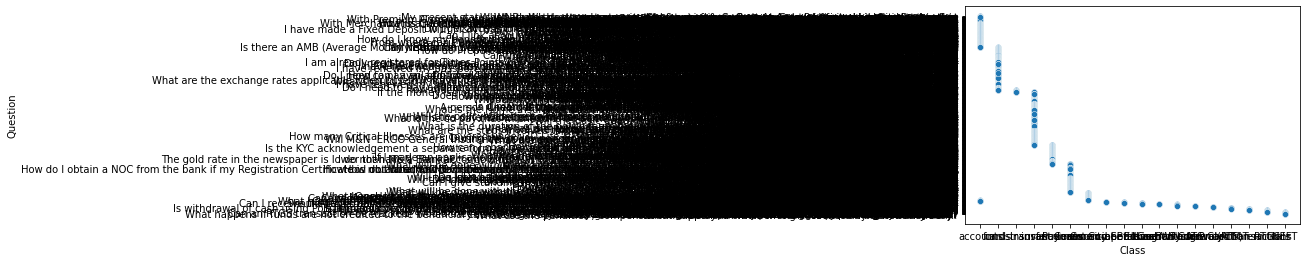

In [ ]:
import seaborn as sns
sns.scatterplot(y="Question", x="Class", sizes=(60, 200), data=dfmaster);

In [ ]:
dfmaster.value_counts()

Question                                                                                 Answer                                                                                                                                                                                                                                                                                                                 Class                        
 Is there a provision of consent for receiving inward transactions through the linkage?  Yes, there is an opt in / opt out feature in the apps of the participating banks in India for receiving the remittances from Singapore.                                                                                                                                                                                Payment and Settlement System    1
What if I Forget my Activation Code / IPIN                                               Incase you have forgotten your Activation Code

In [ ]:
dfmaster['Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0       accounts
1       accounts
2       accounts
3       accounts
4       accounts
          ...   
1585        NEFT
1586        NEFT
1587        NEFT
1588        NEFT
1589        NEFT
Name: Class, Length: 1590, dtype: object>

<AxesSubplot:>

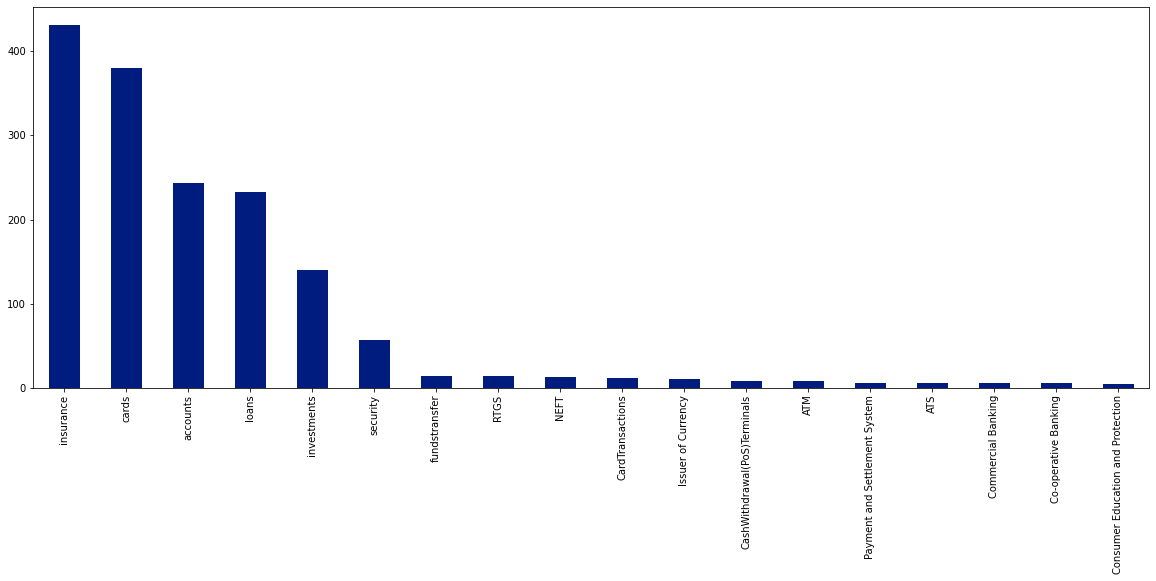

In [ ]:
dfmaster['Class'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

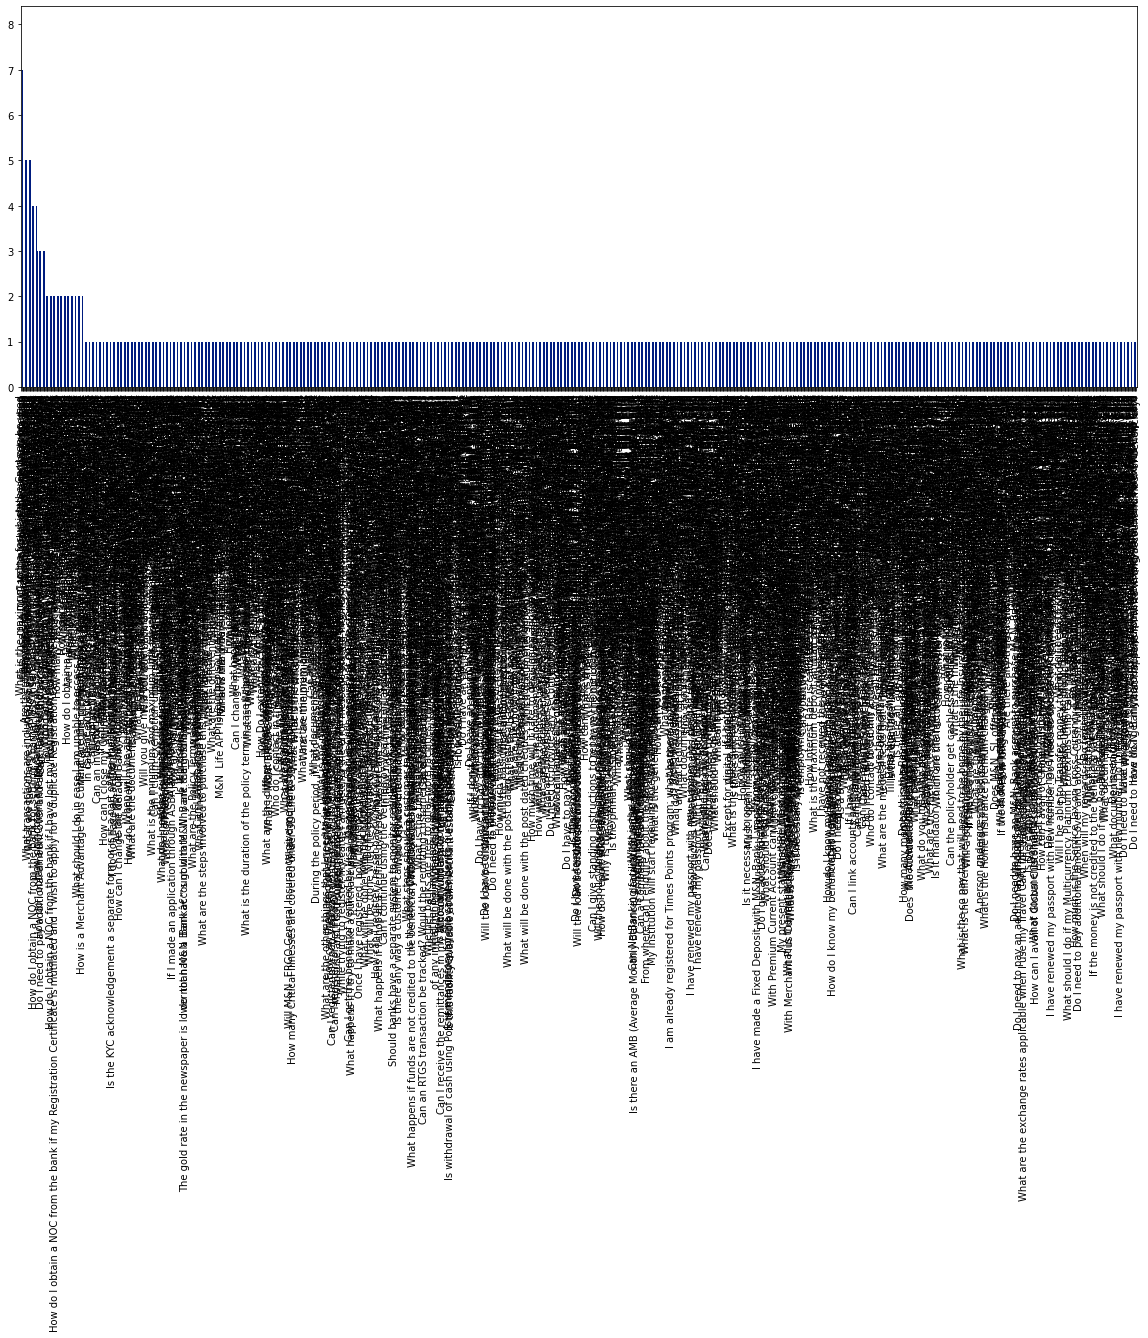

In [ ]:
dfmaster['Question'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Class', ylabel='count'>

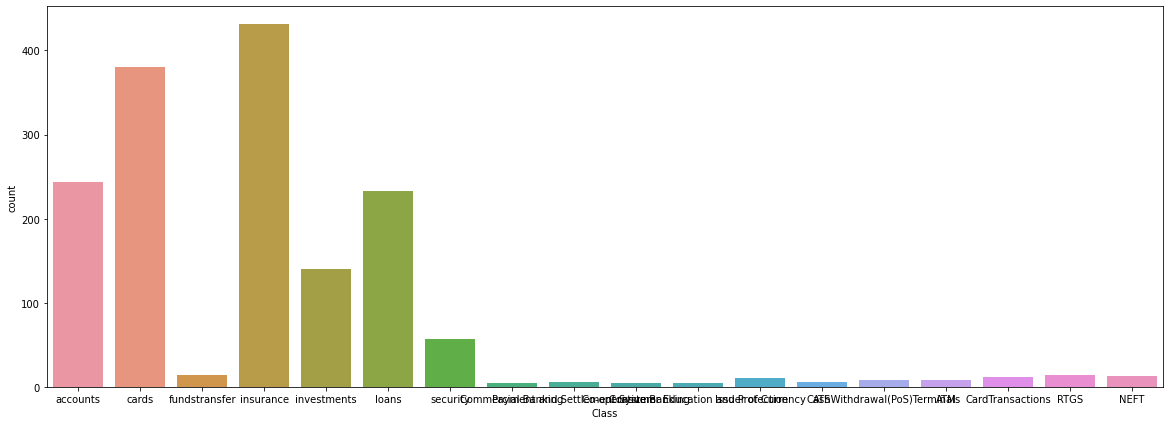

In [ ]:
sns.countplot(data = dfmaster, x= 'Class')

<AxesSubplot:ylabel='Class'>

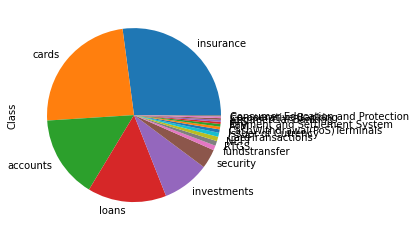

In [ ]:
dfmaster['Class'].value_counts().plot(kind = 'pie')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv')
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder() ## we define le object
df['Class'] = le.fit_transform(df['Class'])
df[:4]

Question  \
0  What are the documents required for opening a ...   
1  Can I transfer my Current Account from one bra...   
2  My present status is NRI. What extra documents...   
3  What are the documents required for opening a ...   

                                              Answer  Class  
0  Following documents are required to open a Cur...     11  
1  Yes, Current Accounts can be transferred from ...     11  
2  NRI/PIO can open the proprietorship/partnershi...     11  
3  Following documents are required for opening a...     11

### **FEATURE EXTRACTION OR FEATURE ENGINEERING**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(dfmaster)
print("Vocabulary: ", vectorizer.vocabulary_)
# Encode the Document
vector = vectorizer.transform(dfmaster)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Vocabulary:  {'question': 2, 'answer': 0, 'class': 1}
Encoded Document is:
[[0 0 1]
 [1 0 0]
 [0 1 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfmaster)
vectorizer.get_feature_names_out()

array(['answer', 'class', 'question'], dtype=object)

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Banking_Chatbot_Material/')
f = open('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv', 'rU')
for row in f: # Correctly selecting the column 
    tokens = word_tokenize(row)
    print(tokens) # Will print tokens in each row
print(tokens) # Will print the tokens of the last row
#for line in f:
#    for field in line:
#tokens = word_tokenize(f)
#print(tokens)

<ipython-input-11-80130fb2f554>:3: DeprecationWarning: 'U' mode is deprecated
  f = open('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv', 'rU')


['Question', ',', 'Answer', ',', 'Class']
['What', 'are', 'the', 'documents', 'required', 'for', 'opening', 'a', 'Current', 'Account', 'of', 'a', 'sole', 'proprietorship', 'firm', ',', 'Following', 'documents', 'are', 'required', 'to', 'open', 'a', 'Current', 'Account', 'of', 'a', 'sole', 'proprietorship', 'entity', ':', 'Proof', 'of', 'existence', 'in', 'the', 'name', 'of', 'firm', 'Proof', 'of', 'address', 'in', 'the', 'name', 'of', 'firm', 'KYC', 'of', 'the', 'proprietor', 'Any', 'two', 'of', 'the', 'below', 'listed', 'documents', 'shall', 'be', 'obtained', 'for', 'establishing', 'proof', 'of', 'existence', '.', 'Registration', 'certificate/license', 'issued', 'by', 'Municipal', 'authorities', 'such', 'as', 'Shop', '&', 'Establishment', 'Certificate/Trade', 'License', 'CST/VAT/Service', 'Tax', 'Certificate', 'or', 'Letter', 'Of', 'Registration', 'for', 'CST/VAT/Service', 'Tax', 'Certificate/Registration', 'document', 'issued', 'by', 'Professional', 'Tax', 'authorities', 'Valid', 'Bu

In [ ]:
#dfmaster.to_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv', index=False)
#for row in dfmaster['Question']: # Correctly selecting the column 
#    Questions = word_tokenize(row)
#    print(Questions) # Will print tokens in each row
#print(Questions) # Will print the tokens of the last row
#lemmatized_Questions = ' '.join([lemmatizer.lemmatize(w) for w in Questions])
#print(lemmatized_Questions)
#dfmaster['Question'].to_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal1.csv', index=False)

In [ ]:
#for row in dfmaster['Answer']: # Correctly selecting the column 
#    Answers = word_tokenize(row)
#    print(Answers) # Will print tokens in each row
#print(Answers) # Will print the tokens of the last row
#lemmatized_Answers = ' '.join([lemmatizer.lemmatize(w) for w in Answers])
#print(lemmatized_Answers)

['Following', 'documents', 'are', 'required', 'to', 'open', 'a', 'Current', 'Account', 'of', 'a', 'sole', 'proprietorship', 'entity', ':', 'Proof', 'of', 'existence', 'in', 'the', 'name', 'of', 'firm', 'Proof', 'of', 'address', 'in', 'the', 'name', 'of', 'firm', 'KYC', 'of', 'the', 'proprietor', 'Any', 'two', 'of', 'the', 'below', 'listed', 'documents', 'shall', 'be', 'obtained', 'for', 'establishing', 'proof', 'of', 'existence', '.', 'Registration', 'certificate/license', 'issued', 'by', 'Municipal', 'authorities', 'such', 'as', 'Shop', '&', 'Establishment', 'Certificate/Trade', 'License', 'CST/VAT/Service', 'Tax', 'Certificate', 'or', 'Letter', 'Of', 'Registration', 'for', 'CST/VAT/Service', 'Tax', 'Certificate/Registration', 'document', 'issued', 'by', 'Professional', 'Tax', 'authorities', 'Valid', 'Business', 'License', 'or', 'Certificate', 'Of', 'Registration', 'issued', 'by', 'State/Central', 'Government', 'authority', '(', 'validity', 'would', 'include', 'the', 'grace', 'period'

In [ ]:
#for row in dfmaster['Class']: # Correctly selecting the column 
#    Class = word_tokenize(row)
#    print(Class) # Will print tokens in each row
#print(Class) # Will print the tokens of the last row
#lemmatized_Class = ' '.join([lemmatizer.lemmatize(w) for w in Class])
#print(lemmatized_Class)

['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']
['accounts']

In [ ]:
# convert to lower case
#df = pd.read_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal1.csv')
#for row in df['Question']: # Correctly selecting the column 
#    Class = row.lower()
#    print(Class) # Will print tokens in each row
#print(Class) # Will print the tokens of the last row
# remove punctuation from each word
#import string
#table = str.maketrans('', '', string.punctuation)
#stripped = [w.translate(table) for w in Questions]
# remove remaining tokens that are not alphabetic
#words = [word for word in stripped if word.isalpha()]
# filter out stop words
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
#words = [w for w in Questions if not w in stop_words]
#print(words)

what are the documents required for opening a current account of a sole proprietorship firm
can i transfer my current account from one branch to another
my present status is nri. what extra documents are required for opening a sole proprietorship current account
what are the documents required for opening a current account of limited liability partnership
what documents are required to change the address of an entity
what are the documents required for opening current account of a company
who can be a partner in a partnership firm
what is the time taken to realize outstation cheques
can an individual open a current account
can eefc account be opened by special economic zone (sez) units
what should i do in case i am unable to access my company's current account
what transactions are included as a part of the free inter-city clearing limit
how is m&n  bank premium ca different from a regular ca offered by most banks
must i open premium current account in each location where i have my com

In [ ]:
# Apply first level cleaning
import re
import string
#This function converts to lower-case, removes square bracket, removes numbers and punctuation
df = pd.read_csv('/content/drive/MyDrive/Banking_Chatbot_Material/dffinal.csv')
def text_clean_1(df):
    df = df.lower()
    df = re.sub('\[.*?\]', '', df)
    df = re.sub('[%s]' % re.escape(string.punctuation), '', df)
    df = re.sub('\w*\d\w*', '', df)
    df = re.sub('[‘’“”…]', '', df)
    df = re.sub('\n', '', df)
    return df

cleaned1 = lambda x: text_clean_1(x)

In [ ]:
df['cleaned_Question'] = pd.DataFrame(df.Question.apply(cleaned1))
df['cleaned_Answer'] = pd.DataFrame(df.Answer.apply(cleaned1))
df['Class'] = pd.DataFrame(df.Class.apply(cleaned1))
df[:3]

Question  \
0  What are the documents required for opening a ...   
1  Can I transfer my Current Account from one bra...   
2  My present status is NRI. What extra documents...   

                                              Answer     Class  \
0  Following documents are required to open a Cur...  accounts   
1  Yes, Current Accounts can be transferred from ...  accounts   
2  NRI/PIO can open the proprietorship/partnershi...  accounts   

                                    cleaned_Question  \
0  what are the documents required for opening a ...   
1  can i transfer my current account from one bra...   
2  my present status is nri what extra documents ...   

                                      cleaned_Answer  
0  following documents are required to open a cur...  
1  yes current accounts can be transferred from o...  
2  nripio can open the proprietorshippartnership ...

In [ ]:
# here in the Question and answer column some words are seperated by "", '', /, !, **, (), . so we have to clean them 
# removing the 'Ascii' characters
rep_chars = 'Ã|\¢|\â|\¬|\„|\€|\˜|\€™|\*|\Å|\Ë|\(|\)|\œ|\!|\"|\#|\$|\%|\&|\\|\™|\'|\+|\,|\-|\.|\/|\:|\;|\<|\=|\>|\?|\@|\^|\_|\`|\{|\|}|\~|\.'
#Ã|¢|â|¬|„|€|˜|€™|*|Å|Ë|œ
df['cleaned_Question'] = df['cleaned_Question'].str.replace(rep_chars,"")
df['cleaned_Answer'] = df['cleaned_Answer'].str.replace(rep_chars, "")
#for index,text in enumerate(df['cleaned_Answer_new'][71:75]):
#  print('cleaned_Answer_new %d:\n'%(index+1),text)
#df['cleaned_Answer_new']

<ipython-input-14-d02fe26ff5c1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_Question'] = df['cleaned_Question'].str.replace(rep_chars,"")
<ipython-input-14-d02fe26ff5c1>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_Answer'] = df['cleaned_Answer'].str.replace(rep_chars, "")


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
def text_preproc(df):
  df = ' '.join([word for word in df.split(' ') if word not in stop_words])
  df = df.encode('ascii', 'ignore').decode()
  df = re.sub(r'https*\S+', ' ', df)
  df = re.sub(r'@\S+', ' ', df)
  df = re.sub(r'#\S+', ' ', df)
  df = re.sub(r'\'\w+', '', df)
  df = re.sub('[%s]' % re.escape(string.punctuation), ' ', df)
  df = re.sub(r'\w*\d+\w*', '', df)
  df = re.sub(r'\s{2,}', ' ', df)
  return df
df['cleaned_Answer'] = df['cleaned_Answer'].apply(text_preproc)
df['cleaned_Question'] = df['cleaned_Question'].apply(text_preproc)
df['cleaned_Class'] = df['Class'].apply(text_preproc)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Question  \
0  What are the documents required for opening a ...   
1  Can I transfer my Current Account from one bra...   
2  My present status is NRI. What extra documents...   
3  What are the documents required for opening a ...   
4  What documents are required to change the addr...   

                                              Answer     Class  \
0  Following documents are required to open a Cur...  accounts   
1  Yes, Current Accounts can be transferred from ...  accounts   
2  NRI/PIO can open the proprietorship/partnershi...  accounts   
3  Following documents are required for opening a...  accounts   
4  Following documents are required to change the...  accounts   

                                    cleaned_Question  \
0  documents required opening current account sol...   
1        transfer current account one branch another   
2  present status nri extra documents required op...   
3  documents required opening current account lim...   
4           documents required change address entity   

                                      cleaned_Answer cleaned_Class  
0  following documents required open current acco...      accounts  
1  yes current accounts transferred one branch an...      accounts  
2  nripio open proprietorshippartnership firm sub...      accounts  
3  following documents required opening current a...      accounts  
4  following documents required change address en...      accounts

In [ ]:
df.drop(columns = ['Question'], inplace = True)
df[:5]
df.drop(columns = ['Answer'], inplace = True)
df[:5]
df.drop(columns = ['Class'], inplace = True)
df[:5]

cleaned_Question  \
0  documents required opening current account sol...   
1        transfer current account one branch another   
2  present status nri extra documents required op...   
3  documents required opening current account lim...   
4           documents required change address entity   

                                      cleaned_Answer cleaned_Class  
0  following documents required open current acco...      accounts  
1  yes current accounts transferred one branch an...      accounts  
2  nripio open proprietorshippartnership firm sub...      accounts  
3  following documents required opening current a...      accounts  
4  following documents required change address en...      accounts

In [ ]:
import re
from collections import Counter
Counter(" ".join(df['cleaned_Question']).split()).most_common(50)

[('card', 313),
 ('account', 237),
 ('bank', 176),
 ('mn', 172),
 ('loan', 150),
 ('policy', 130),
 ('plan', 125),
 ('need', 86),
 ('get', 85),
 ('forexplus', 83),
 ('insurance', 72),
 ('available', 70),
 ('debit', 68),
 ('transaction', 61),
 ('current', 54),
 ('education', 54),
 ('deposit', 53),
 ('transactions', 50),
 ('loans', 49),
 ('benefit', 48),
 ('charges', 47),
 ('use', 44),
 ('open', 43),
 ('amount', 43),
 ('purchase', 42),
 ('pay', 41),
 ('cash', 40),
 ('avail', 40),
 ('platinum', 39),
 ('savings', 38),
 ('required', 37),
 ('facility', 36),
 ('value', 36),
 ('life', 36),
 ('change', 35),
 ('time', 35),
 ('case', 34),
 ('much', 34),
 ('funds', 34),
 ('fixed', 34),
 ('option', 34),
 ('car', 34),
 ('documents', 33),
 ('benefits', 33),
 ('take', 33),
 ('times', 33),
 ('premium', 32),
 ('atm', 31),
 ('chip', 31),
 ('different', 29)]

In [ ]:
from sklearn.model_selection import train_test_split
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X = df.cleaned_Question
y = df.cleaned_Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))

X_train : 1271
X_test  : 318
y_train : 1271
y_test  : 318


Predictive Modelling - Logistic Regression

In [ ]:
X = df.cleaned_Question
y = df.cleaned_Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 120)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.8647798742138365
Precision :  0.9173053541971021
Recall :  0.8647798742138365


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder() ## now treat "Class" columns 
df.le = df ## where we apply LE
df['cleaned_Class'] = le.fit_transform(df['cleaned_Class'])
df[:4]

cleaned_Question  \
0  documents required opening current account sol...   
1        transfer current account one branch another   
2  present status nri extra documents required op...   
3  documents required opening current account lim...   

                                      cleaned_Answer  cleaned_Class  
0  following documents required open current acco...              0  
1  yes current accounts transferred one branch an...              0  
2  nripio open proprietorshippartnership firm sub...              0  
3  following documents required opening current a...              0

Predictive Modelling - Logistic Regression

In [ ]:
X = df.cleaned_Question
y = df.cleaned_Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 120)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
tvec = TfidfVectorizer()
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.8742138364779874
Precision :  0.8864545519578851


Predictive Modelling - SVM


In [ ]:
X = df.cleaned_Question
y = df.cleaned_Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 120)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
tvec = TfidfVectorizer()
clf2 = svm.SVC(kernel = 'rbf')
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted') 

Accuracy :  0.8930817610062893
Precision :  0.9220110276987166


0.8840073231697168

Predictive Modelling - Random_Forest

In [ ]:
X = df.cleaned_Question
y = df.cleaned_Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 120)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
tvec = TfidfVectorizer()
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

Accuracy :  0.8710691823899371
Precision :  0.88513536611343


0.868200874657896